This project aims to accurately predict whether or not an employee will leave his/her job in the future.



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_csv("/content/WA_Fn-UseC_-HR-Employee-Attrition.csv")

## Exploratory Data Analysis

In [3]:
df.shape

(1470, 35)

In [4]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  ...  RelationshipSatisfaction  StandardHours  \
count  1470.000000  ...               1470.000000         1470.0   
mean      2.063946  ...                  2.712245           80.0   
std       1.106940  ...                  1.081209            0.0   
min       1.000000  ...                  1.000000           80.0   
25%       1.000000  ...                  2.000000           80.0   
50%       2.000000  ...                  3.000000           80.0   
75%       3.000000  ...                  4.000000           80.0   
max       5.000000  ...                  4.000000           80.0   

       StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
count       1470.000000        1470.000000            1470.000000   
mean           0.793878          11.279592               2.799320   
std            0.852077           7.780782               1.289271   
min            0.000000           0.000000               0.000000   
25%            0.000000           6.000000               2.000000   
50%            1.000000          10.000000               3.000000   
75%            1.000000          15.000000               3.000000   
max            3.000000          40.000000               6.000000   

       WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
count      1470.000000     1470.000000         1470.000000   
mean          2.761224        7.008163            4.229252   
std           0.706476        6.126525            3.623137   
min           1.000000        0.000000            0.000000   
25%           2.000000        3.000000            2.000000   
50%           3.000000        5.000000            3.000000   
75%           3.000000        9.000000            7.000000   
max           4.000000       40.000000           18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  
count              1470.000000           1470.000000  
mean                  2.187755              4.123129  
std                   3.222430              3.568136  
min                   0.000000              0.000000  
25%                   0.000000              2.000000  
50%                   1.000000              3.000000  
75%                   3.000000              7.000000  
max                  15.000000             17.000000  

[8 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [7]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [8]:
print(df.EmployeeCount.unique())
print(df.Over18.unique())
print(df.StandardHours.unique())

[1]
['Y']
[80]


Since, these columns have only one value in the whole dataset, they have absolutely no use in this classification problem. I will remove these columns.

In [9]:
df.drop(['EmployeeCount', 'Over18', 'StandardHours'], axis = 1, inplace = True)

The EmployeeNumber is basically the unique ID of each employee. It has no relevance in the analysis and shall be removed.

In [10]:
df.drop(['EmployeeNumber'], axis = 1, inplace = True)

### Univariate Analysis

<Axes: ylabel='Attrition'>

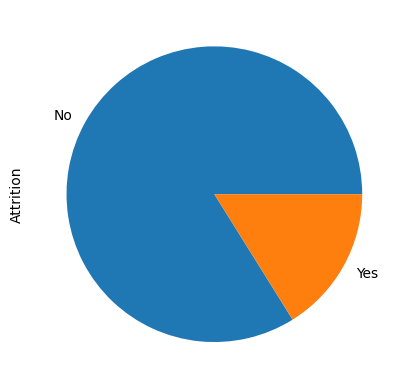

In [11]:
df.Attrition.value_counts().plot.pie()

<Axes: >

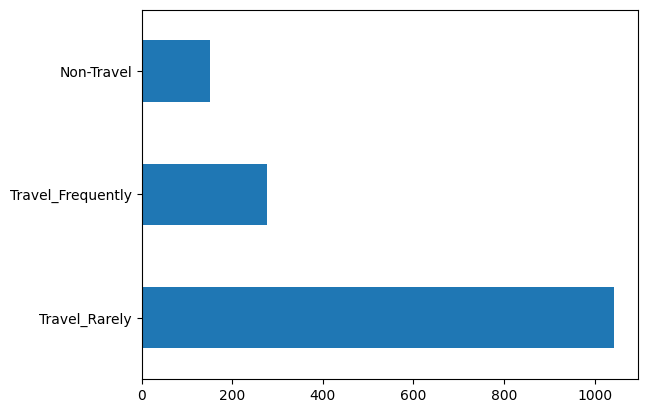

In [12]:
df.BusinessTravel.value_counts().plot.barh()

<Axes: ylabel='Department'>

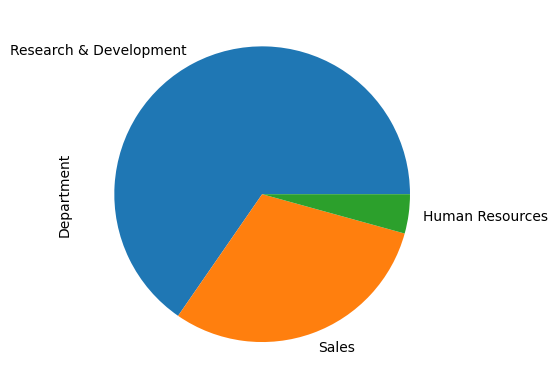

In [13]:
df.Department.value_counts().plot.pie()

<Axes: ylabel='EducationField'>

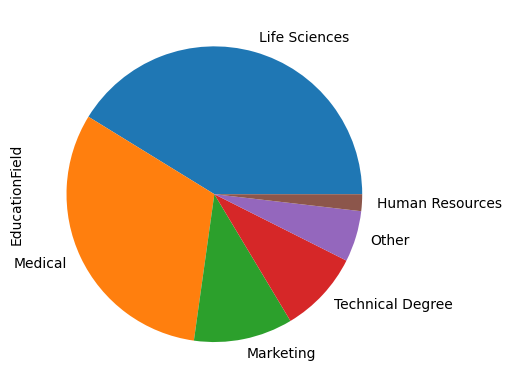

In [14]:
df.EducationField.value_counts().plot.pie()

<Axes: ylabel='Gender'>

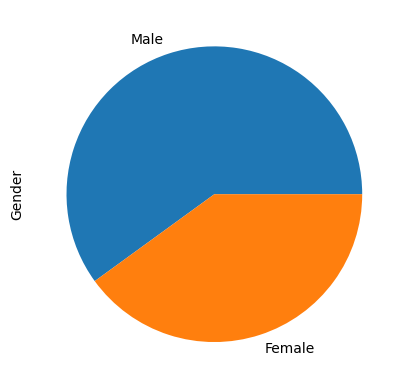

In [15]:
df.Gender.value_counts().plot.pie()

<Axes: >

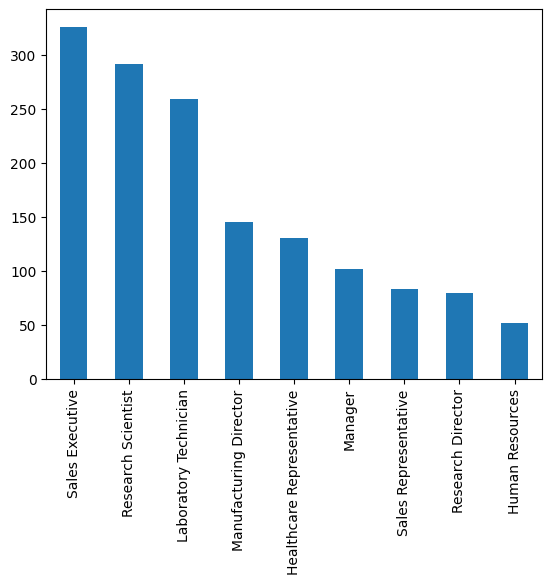

In [16]:
df.JobRole.value_counts().plot.bar()

<Axes: ylabel='MaritalStatus'>

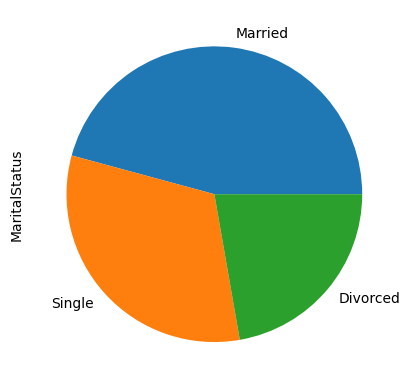

In [17]:
df.MaritalStatus.value_counts().plot.pie()

<Axes: ylabel='OverTime'>

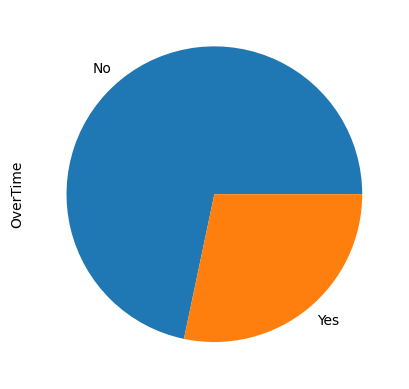

In [18]:
df.OverTime.value_counts().plot.pie()

### Bivariate Analysis

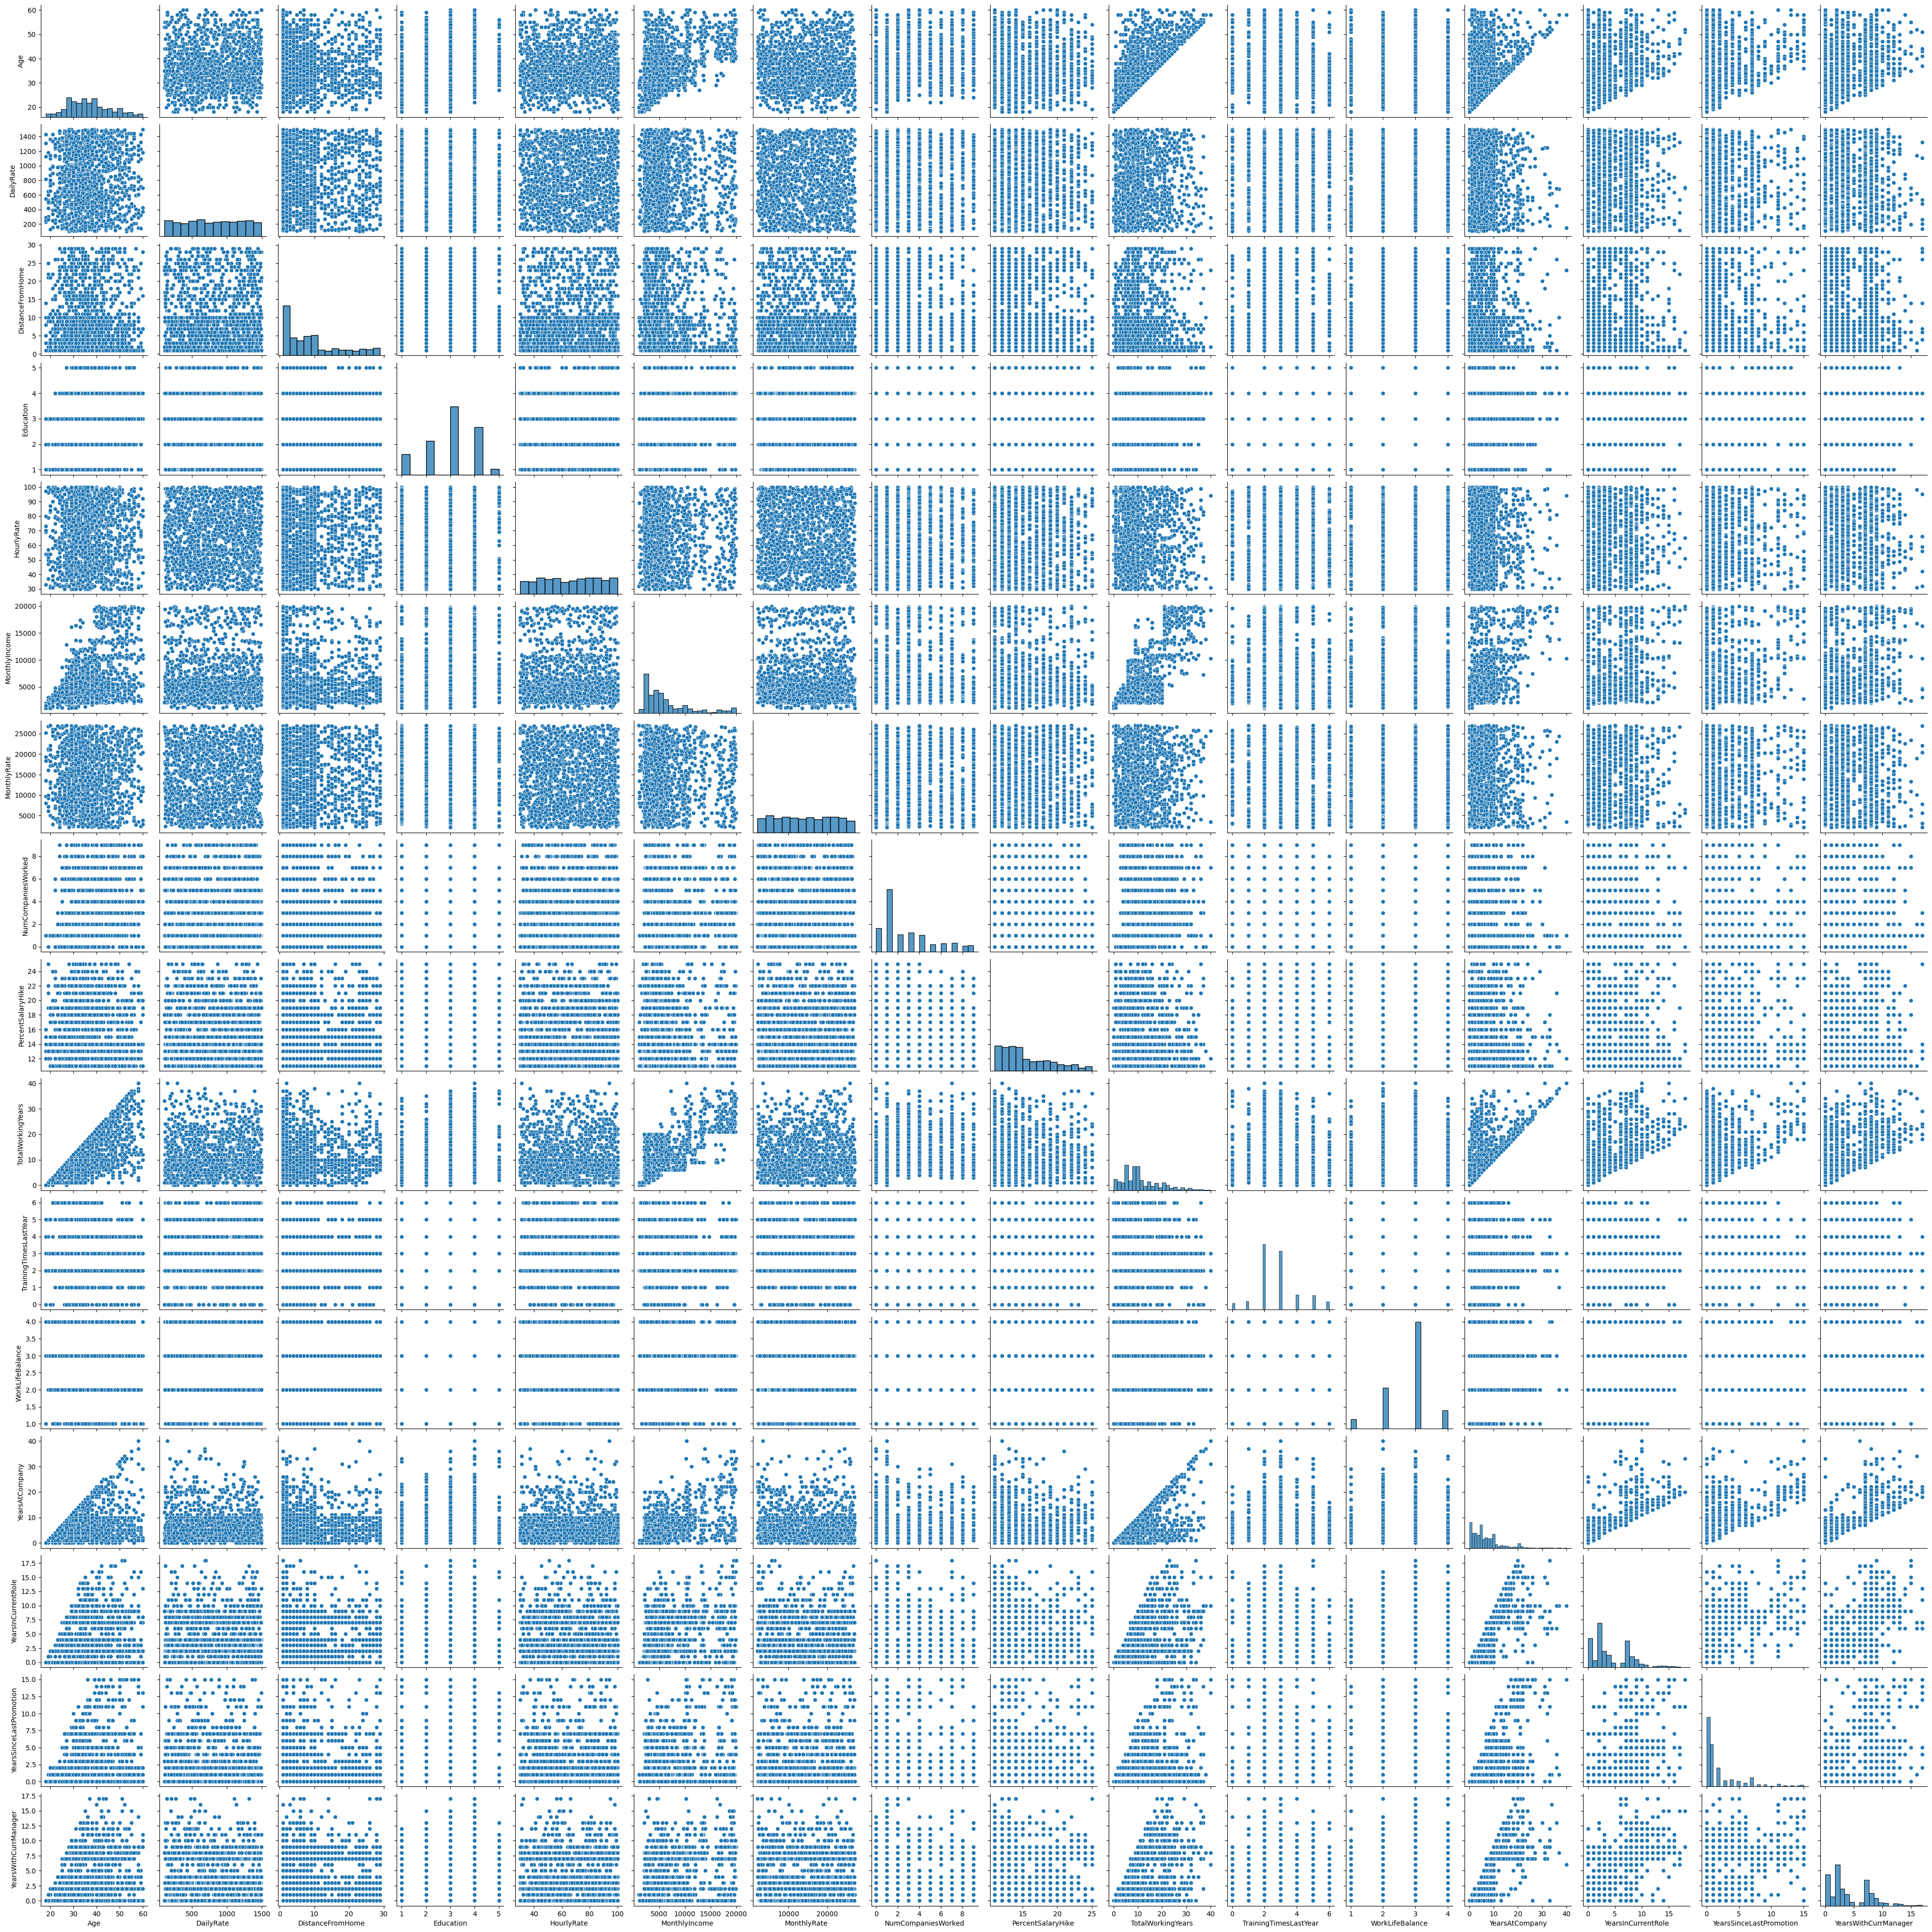

In [19]:
sns.pairplot(data = df, vars = ['Age', 'DailyRate', 'DistanceFromHome', 'Education',	'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears',	'TrainingTimesLastYear',	'WorkLifeBalance',	'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'])

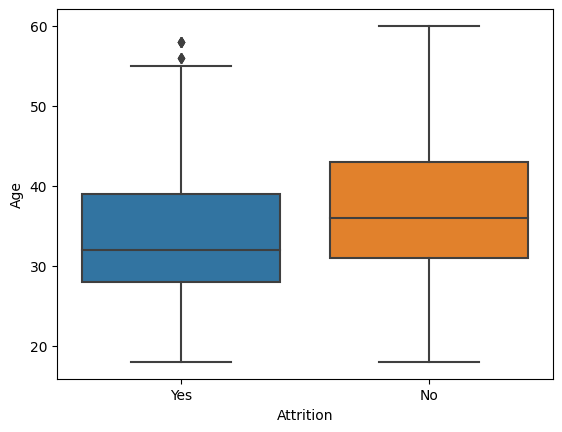

In [20]:
sns.boxplot(data = df, x = "Attrition", y = "Age")
plt.show()

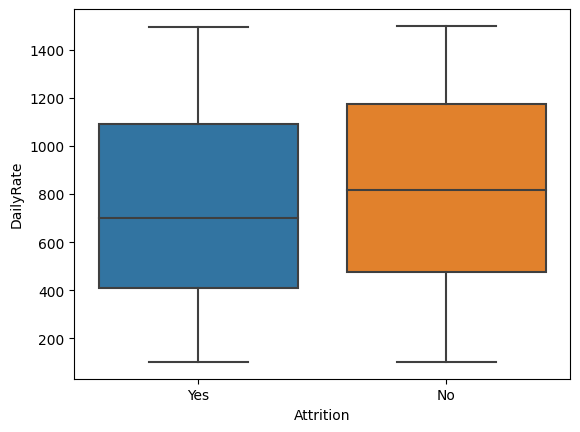

In [21]:
sns.boxplot(data = df, x = "Attrition", y = "DailyRate")
plt.show()

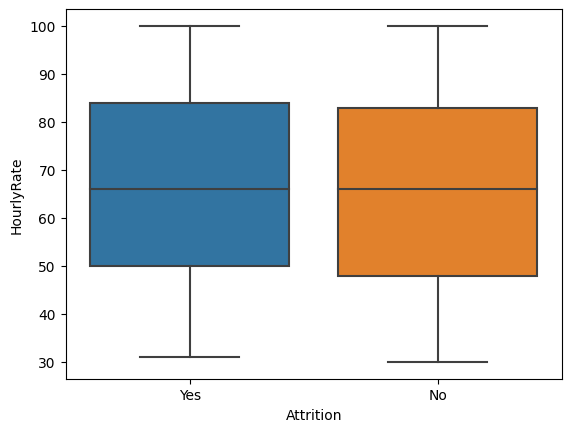

In [22]:
sns.boxplot(data = df, x = "Attrition", y = "HourlyRate")
plt.show()

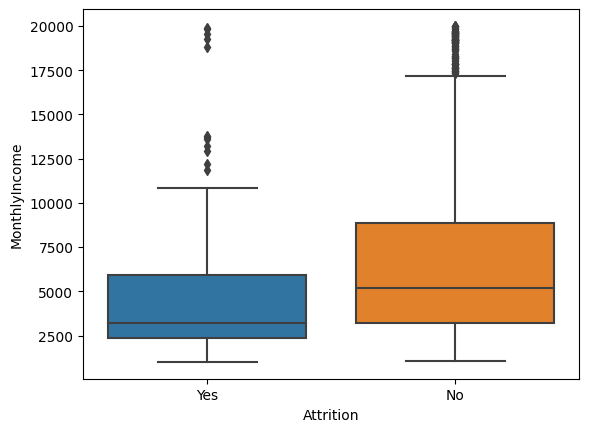

In [23]:
sns.boxplot(data = df, x = "Attrition", y = "MonthlyIncome")
plt.show()

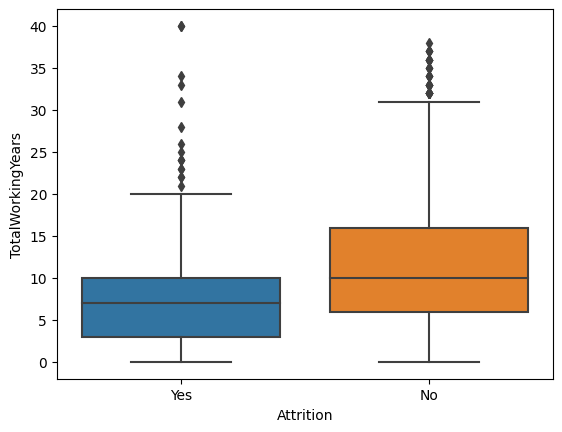

In [24]:
sns.boxplot(data = df, x = "Attrition", y = "TotalWorkingYears")
plt.show()

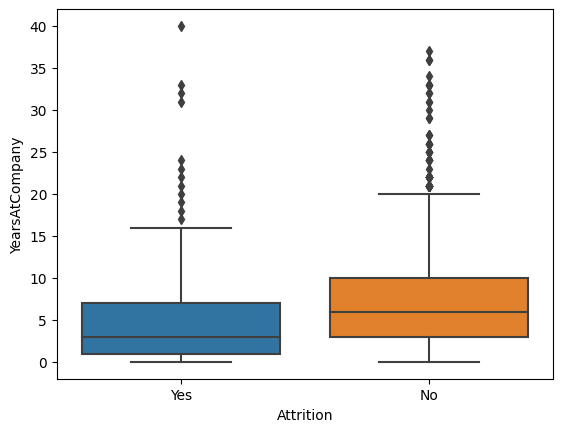

In [25]:
sns.boxplot(data = df, x = "Attrition", y = "YearsAtCompany")
plt.show()

In [26]:
copy = df.copy()

In [27]:
copy['attrition_flag'] = np.where(copy.Attrition == "Yes", 1, 0)

<Axes: ylabel='MaritalStatus'>

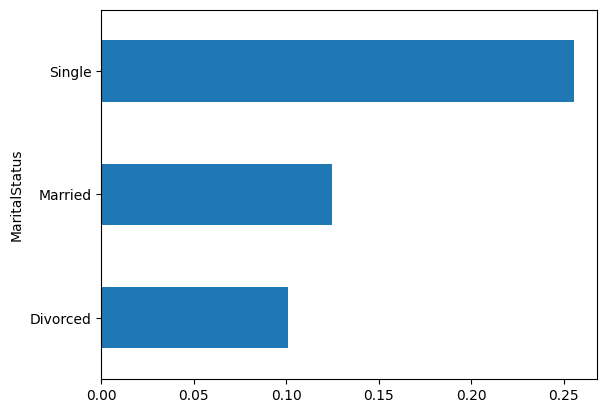

In [28]:
copy.groupby(['MaritalStatus'])['attrition_flag'].mean().plot.barh()

<Axes: ylabel='BusinessTravel'>

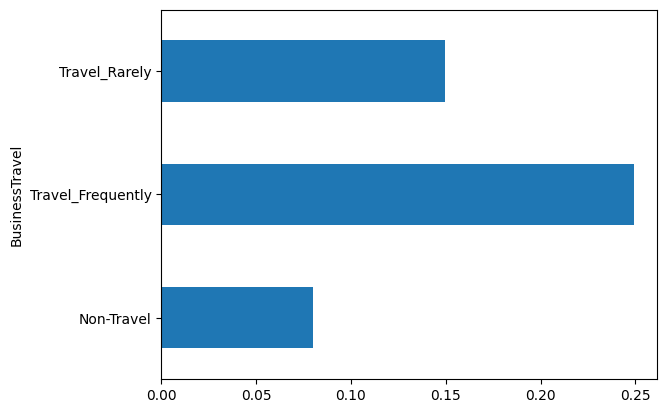

In [29]:
copy.groupby(['BusinessTravel'])['attrition_flag'].mean().plot.barh()

<Axes: ylabel='OverTime'>

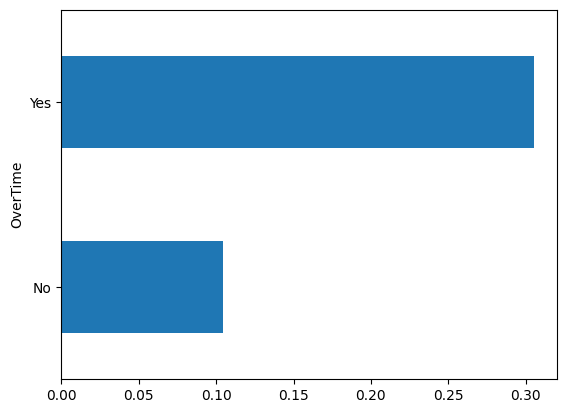

In [30]:
copy.groupby(['OverTime'])['attrition_flag'].mean().plot.barh()

<Axes: ylabel='JobRole'>

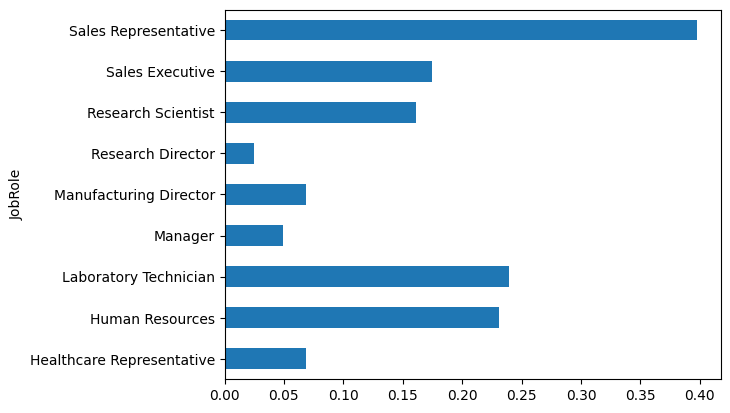

In [31]:
copy.groupby(['JobRole'])['attrition_flag'].mean().plot.barh()

### Multivariate Analysis

<Axes: xlabel='MaritalStatus', ylabel='EducationField'>

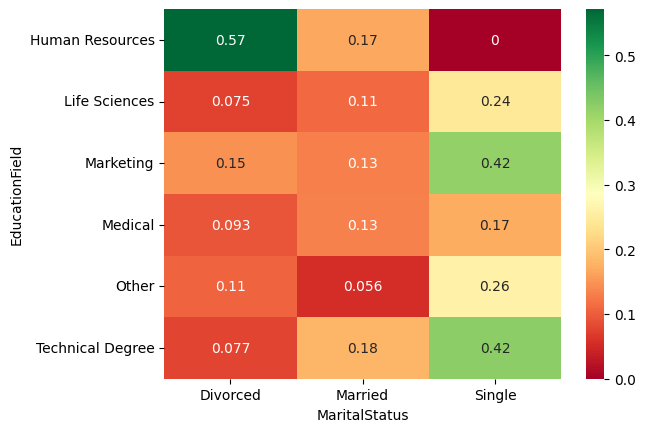

In [32]:
p1 = pd.pivot_table(data = copy, index = 'EducationField', columns = 'MaritalStatus', values = 'attrition_flag')
sns.heatmap(p1, annot = True, cmap = 'RdYlGn')

<Axes: xlabel='MaritalStatus', ylabel='JobRole'>

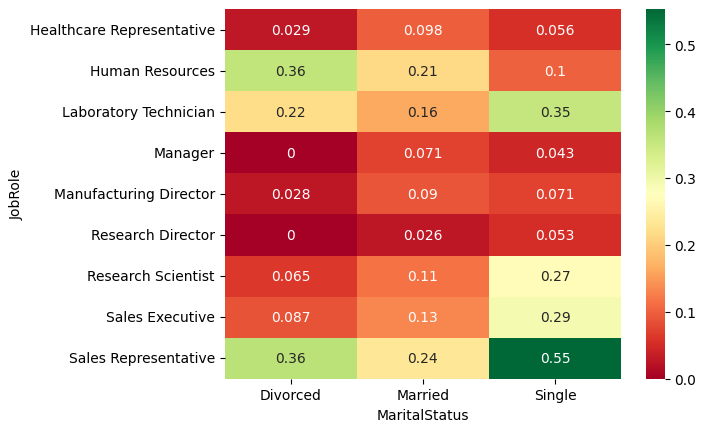

In [33]:
p2 = pd.pivot_table(data = copy, index = 'JobRole', columns = 'MaritalStatus', values = 'attrition_flag')
sns.heatmap(p2, annot = True, cmap = 'RdYlGn')

<Axes: xlabel='BusinessTravel', ylabel='EducationField'>

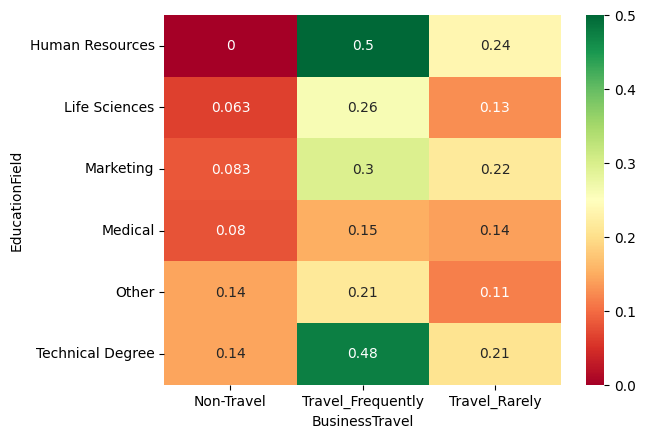

In [34]:
p3 = pd.pivot_table(data = copy, index = 'EducationField', columns = 'BusinessTravel', values = 'attrition_flag')
sns.heatmap(p3, annot = True, cmap = 'RdYlGn')

Binary categorical variables like "Yes" or "No" and "Male" or "Female" ought to be converted to 0, 1.

In [35]:
copy.drop(['attrition_flag'], axis = 1, inplace = True)

Encoding unordered categorical variables with more than 2 distinct values.

In [36]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No': 0})
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [37]:
copy = pd.get_dummies(copy, columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [38]:
dfi = df.select_dtypes('int64')

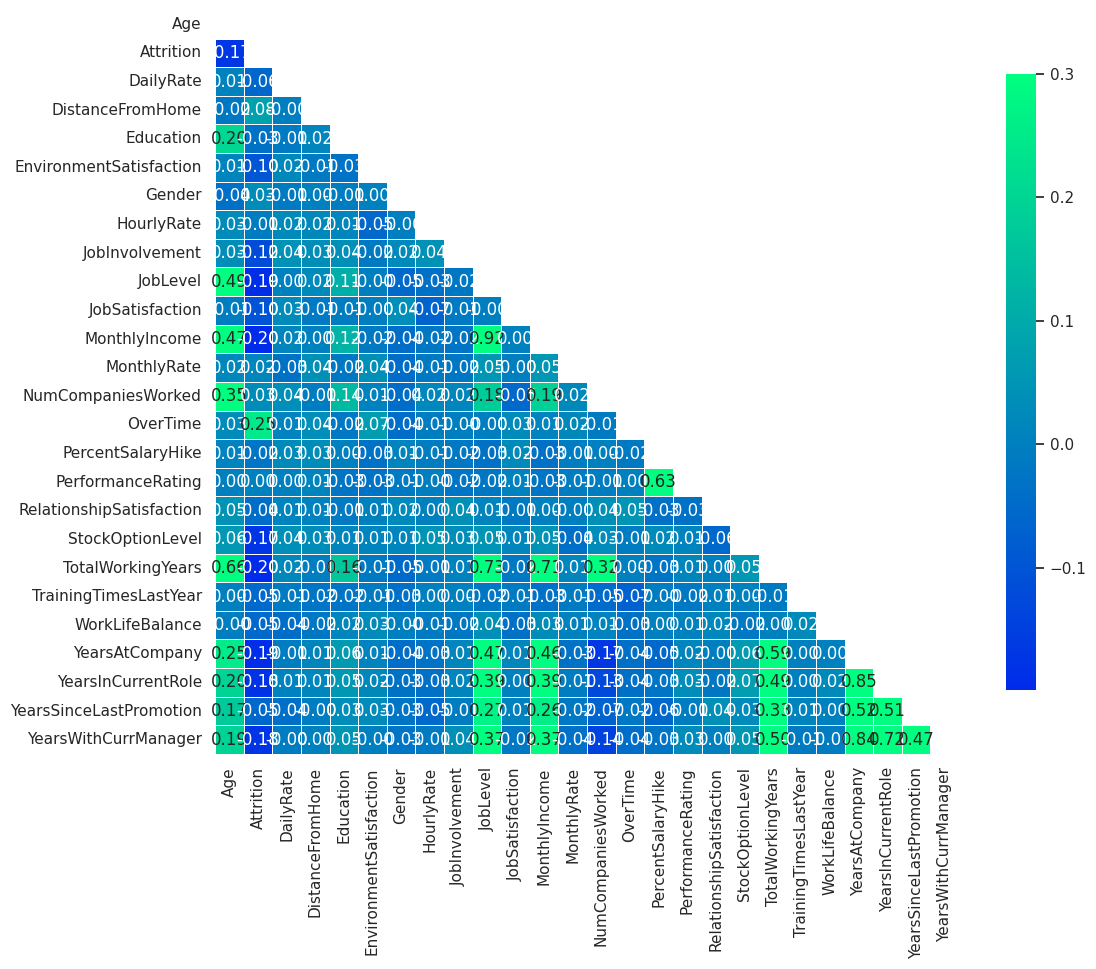

In [39]:
corr = dfi.corr(method = "spearman")
sns.set(style = "white")
mask = np.triu(np.ones_like(corr, dtype = bool))
plt.figure(figsize=(12, 10), dpi = 100)
sns.heatmap(corr, mask = mask, cmap = "winter", vmax = .3, center = 0, square = True, linewidths = .5, cbar_kws = {"shrink": .8}, annot = True, fmt = ".2f")
plt.show()

Encoding categorical variabes with multiple values.

In [40]:
DF = df.copy()

DF['Attrition'] = DF['Attrition'].replace('Yes',2)
DF['Attrition'] = DF['Attrition'].replace('No',3)

DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Rarely',2)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Travel_Frequently',3)
DF['BusinessTravel'] = DF['BusinessTravel'].replace('Non-Travel',4)

DF['Department'] = DF['Department'].replace('Sales',2)
DF['Department'] = DF['Department'].replace('Human Resources',3)
DF['Department'] = DF['Department'].replace('Research & Development',4)

DF['EducationField'] = DF['EducationField'].replace('Life Sciences',2)
DF['EducationField'] = DF['EducationField'].replace('Medical',3)
DF['EducationField'] = DF['EducationField'].replace('Marketing',4)
DF['EducationField'] = DF['EducationField'].replace('Technical Degree',2)
DF['EducationField'] = DF['EducationField'].replace('Human Resources',3)
DF['EducationField'] = DF['EducationField'].replace('Other',4)

DF['Gender'] = DF['Gender'].replace('Male',2)
DF['Gender'] = DF['Gender'].replace('Female',3)

DF['JobRole'] = DF['JobRole'].replace('Sales Executive',2)
DF['JobRole'] = DF['JobRole'].replace('Manufacturing Director',3)
DF['JobRole'] = DF['JobRole'].replace('Healthcare Representative',4)
DF['JobRole'] = DF['JobRole'].replace('Manager',2)
DF['JobRole'] = DF['JobRole'].replace('Research Director',3)
DF['JobRole'] = DF['JobRole'].replace('Laboratory Technician',4)
DF['JobRole'] = DF['JobRole'].replace('Sales Representative',2)
DF['JobRole'] = DF['JobRole'].replace('Research Scientist',3)
DF['JobRole'] = DF['JobRole'].replace('Human Resources',4)

DF['MaritalStatus'] = DF['MaritalStatus'].replace('Single', 2)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Married', 3)
DF['MaritalStatus'] = DF['MaritalStatus'].replace('Divorced', 4)

DF['OverTime'] = DF['OverTime'].replace('Yes',2)
DF['OverTime'] = DF['OverTime'].replace('No',3)

From cell 40, clearly, some combinations of variables have high correlation and therefore I will remove them.

In [41]:
DF.drop(['MonthlyIncome' ,'YearsInCurrentRole' , 'YearsAtCompany', 'YearsWithCurrManager'], axis = 1, inplace = True)

## Data Preprocessing

In [42]:
scale = MinMaxScaler(feature_range = (0, 1))
DFx = DF.drop(columns = ['Attrition'])
norm = scale.fit_transform(DF)
N = pd.DataFrame(norm, columns = DF.columns)

In [43]:
X = pd.DataFrame(N.drop(columns = 'Attrition'))
y = pd.DataFrame(N.Attrition).values.reshape(-1, 1)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

As observed in cell 11 of this notebook, this dataset has a data imabalance problem. Therefore, I will be importing and using the SMOTE module. SMOTE is specifically designed to tackle imbalanced datasets by generating synthetic samples for the minority class.

In [45]:
from imblearn.over_sampling import SMOTE
oversampler = SMOTE(random_state = 0)
smote_train, smote_target = oversampler.fit_resample(X_train, y_train)

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Random Forest Classifier

In [47]:
rfc = RandomForestClassifier()
rfc = rfc.fit(smote_train , smote_target)


y_pred = rfc.predict(X_test)

print ('accuracy', accuracy_score(y_test, y_pred))

accuracy 0.9829931972789115


## Model Evaluation

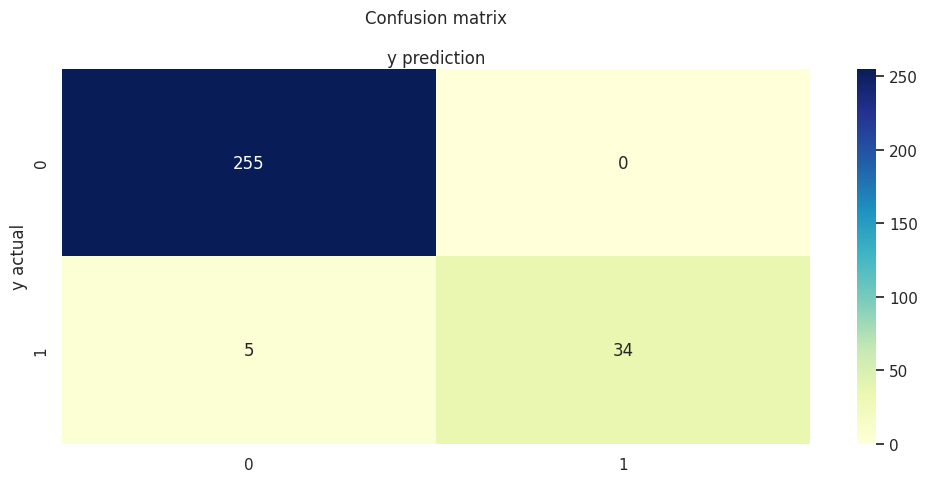

              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       255
         1.0       1.00      0.87      0.93        39

    accuracy                           0.98       294
   macro avg       0.99      0.94      0.96       294
weighted avg       0.98      0.98      0.98       294



In [48]:
fig, ax = plt.subplots(figsize = (10,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, cmap = "YlGnBu" ,fmt = 'g')
plt.title('Confusion matrix', y = 1.1)
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.xlabel('y prediction')
plt.ylabel('y actual')
plt.show()

print(classification_report(y_test, y_pred))